<a href="https://colab.research.google.com/github/PoornimaMC/C0vid-19/blob/main/covid_19_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/archive.zip')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189999 entries, 0 to 189998
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   iso_code                    189999 non-null  object 
 1   continent                   179435 non-null  object 
 2   location                    189999 non-null  object 
 3   date                        189999 non-null  object 
 4   total_cases                 189999 non-null  int64  
 5   new_cases                   189999 non-null  int64  
 6   new_cases_smoothed          189999 non-null  float64
 7   total_deaths                189999 non-null  int64  
 8   new_deaths                  189999 non-null  int64  
 9   new_deaths_smoothed         189999 non-null  float64
 10  total_cases_per_million     189999 non-null  float64
 11  new_cases_per_million       189999 non-null  float64
 12  total_deaths_per_million    189999 non-null  float64
 13  reproduction_r

In [ ]:
data.isnull().sum()

iso_code                          0
continent                     10564
location                          0
date                              0
total_cases                       0
new_cases                         0
new_cases_smoothed                0
total_deaths                      0
new_deaths                        0
new_deaths_smoothed               0
total_cases_per_million           0
new_cases_per_million             0
total_deaths_per_million          0
reproduction_rate                 0
hosp_patients                     0
total_tests                       0
positive_rate                     0
tests_units                       0
total_vaccinations                0
people_vaccinated                 0
people_fully_vaccinated           0
total_boosters                    0
new_vaccinations                  0
stringency_index                  0
population                        0
population_density                0
aged_65_older                     0
aged_70_older               

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data['Month'] = data['date'].apply(lambda date: date.month)
data['Year'] = data['date'].apply(lambda date: date.year)

In [ ]:
data.drop( columns = 'date' , inplace = True)

In [ ]:
data.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,Month,Year
0,AFG,Asia,Afghanistan,5,5,0.0,0,0,0.0,0.125,...,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,2,2020
1,AFG,Asia,Afghanistan,5,0,0.0,0,0,0.0,0.125,...,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,2,2020
2,AFG,Asia,Afghanistan,5,0,0.0,0,0,0.0,0.125,...,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,2,2020
3,AFG,Asia,Afghanistan,5,0,0.0,0,0,0.0,0.125,...,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,2,2020
4,AFG,Asia,Afghanistan,5,0,0.0,0,0,0.0,0.125,...,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,2,2020


In [ ]:
# Defining a color pattern based
colrcode = [(31, 119, 180), (255, 127, 14),\
             (44, 160, 44), (214, 39, 40), \
             (148, 103, 189),  (140, 86, 75), \
             (227, 119, 194), (127, 127, 127), \
             (188, 189, 34), (23, 190, 207)]
   
for i in range(len(colrcode)):  
    r, g, b = colrcode[i]  
    colrcode[i] = (r / 255., g / 255., b / 255.,)

In [ ]:
def prepare_plot_area(ax):
    # Remove plot frame lines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False) 
    
    # X and y ticks on bottom and left
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left() 

In [ ]:
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_laimit
    else:
        return value

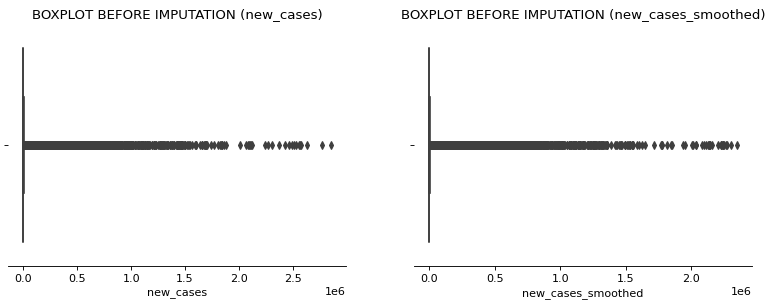

In [ ]:
fig,axes = plt.subplots(dpi = 80 , figsize = (12,4) , nrows = 1 , ncols = 2)
plt.sca(axes[0])
sns.boxplot(data['new_cases'])
plt.title('BOXPLOT BEFORE IMPUTATION (new_cases)')
prepare_plot_area(plt.gca())

plt.sca(axes[1])
sns.boxplot(data['new_cases_smoothed'])
plt.title('BOXPLOT BEFORE IMPUTATION (new_cases_smoothed)')
prepare_plot_area(plt.gca())

In [ ]:
print(' NEW CASES ')
q3 = data['new_cases'].quantile(0.75)
q1 = data['new_cases'].quantile(0.25)
iqr= q3 - q1
print("iqr:" , iqr)
upper_limit = q3 + iqr * 1.5
lower_limit = q1 - iqr * 1.5
print("[upperlimit , lower_limit]", "=",   upper_limit ,",", lower_limit)
data['new_cases'] = data['new_cases'].apply(limit_imputer)

print('NEW CASES SMOOTHED')
q3 = data['new_cases_smoothed'].quantile(0.75)
q1 = data['new_cases_smoothed'].quantile(0.25)
iqr= q3 - q1
print("iqr:" , iqr)
upper_limit = q3 + iqr * 1.5
lower_limit = q1 - iqr * 1.5
print("[upperlimit , lower_limit]", "=",   upper_limit ,",", lower_limit)
data['new_cases_smoothed'] = data['new_cases_smoothed'].apply(limit_imputer)

 NEW CASES 
iqr: 841.0
[upperlimit , lower_limit] = 2102.5 , -1261.5
NEW CASES SMOOTHED
iqr: 954.857
[upperlimit , lower_limit] = 2391.5715 , -1427.8564999999999


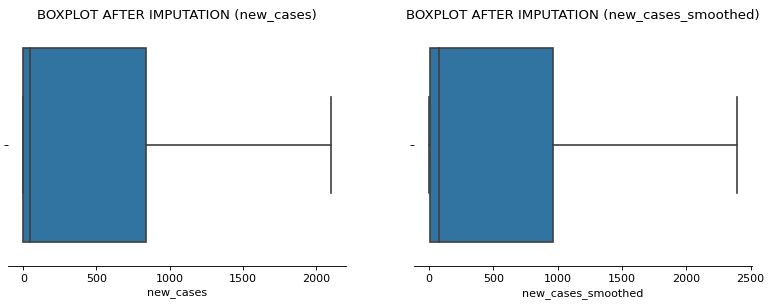

In [ ]:
fig,axes = plt.subplots(dpi = 80 , figsize = (12,4) , nrows = 1 , ncols = 2)
plt.sca(axes[0])
sns.boxplot(data['new_cases'])
plt.title('BOXPLOT AFTER IMPUTATION (new_cases)')
prepare_plot_area(plt.gca())

plt.sca(axes[1])
sns.boxplot(data['new_cases_smoothed'])
plt.title('BOXPLOT AFTER IMPUTATION (new_cases_smoothed)')
prepare_plot_area(plt.gca())

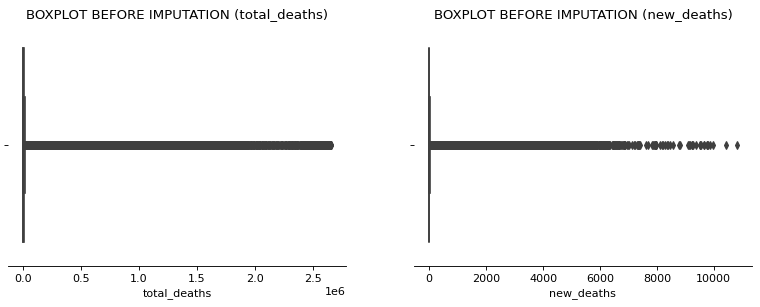

In [ ]:
fig,axes = plt.subplots(dpi = 80 , figsize = (12,4) , nrows = 1 , ncols = 2)
plt.sca(axes[0])
sns.boxplot(data['total_deaths'])
plt.title('BOXPLOT BEFORE IMPUTATION (total_deaths)')
prepare_plot_area(plt.gca())

plt.sca(axes[1])
sns.boxplot(data['new_deaths'])
plt.title('BOXPLOT BEFORE IMPUTATION (new_deaths)')
prepare_plot_area(plt.gca())

In [ ]:
print('TOTAL DEATHS')
q3 = data['total_deaths'].quantile(0.75)
q1 = data['total_deaths'].quantile(0.25)
iqr= q3 - q1
print("iqr:" , iqr)
upper_limit = q3 + iqr * 1.5
lower_limit = q1 - iqr * 1.5
print("[upperlimit , lower_limit]", "=",   upper_limit ,",", lower_limit)
data['total_deaths'] = data['total_deaths'].apply(limit_imputer)

print('NEW DEATHS')
q3 = data['new_deaths'].quantile(0.75)
q1 = data['new_deaths'].quantile(0.25)
iqr= q3 - q1
print("iqr:" , iqr)
upper_limit = q3 + iqr * 1.5
lower_limit = q1 - iqr * 1.5
print("[upperlimit , lower_limit]", "=",   upper_limit ,",", lower_limit)
data['new_deaths'] = data['new_deaths'].apply(limit_imputer)

TOTAL DEATHS
iqr: 7038.0
[upperlimit , lower_limit] = 17628.0 , -10524.0
NEW DEATHS
iqr: 10.0
[upperlimit , lower_limit] = 25.0 , -15.0


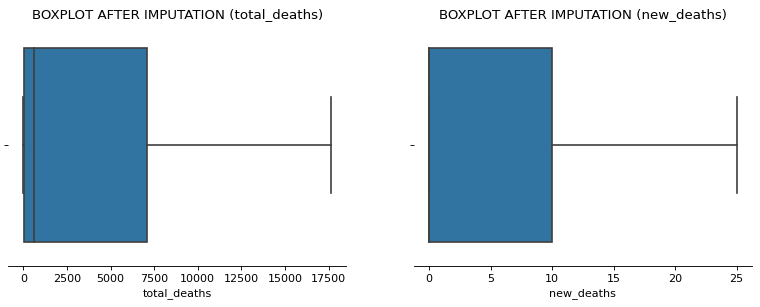

In [ ]:
fig,axes = plt.subplots(dpi = 80 , figsize = (12,4) , nrows = 1 , ncols = 2)
plt.sca(axes[0])
sns.boxplot(data['total_deaths'])
plt.title('BOXPLOT AFTER IMPUTATION (total_deaths)')
prepare_plot_area(plt.gca())

plt.sca(axes[1])
sns.boxplot(data['new_deaths'])
plt.title('BOXPLOT AFTER IMPUTATION (new_deaths)')
prepare_plot_area(plt.gca())

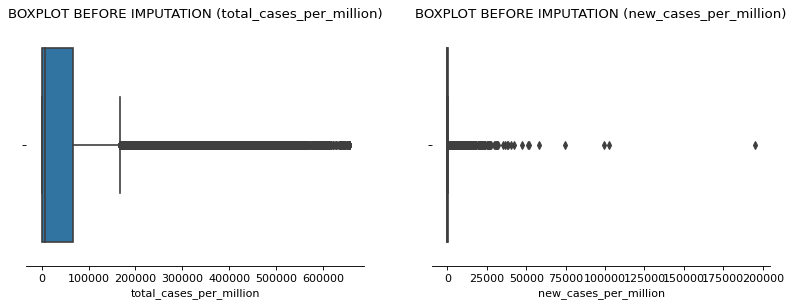

In [ ]:
fig,axes = plt.subplots(dpi = 80 , figsize = (12,4) , nrows = 1 , ncols = 2)
plt.sca(axes[0])
sns.boxplot(data['total_cases_per_million'])
plt.title('BOXPLOT BEFORE IMPUTATION (total_cases_per_million)')
prepare_plot_area(plt.gca())

plt.sca(axes[1])
sns.boxplot(data['new_cases_per_million'])
plt.title('BOXPLOT BEFORE IMPUTATION (new_cases_per_million)')
prepare_plot_area(plt.gca())

In [ ]:
print(' TOTAL CASES PER MILLION ')
q3 = data['total_cases_per_million'].quantile(0.75)
q1 = data['total_cases_per_million'].quantile(0.25)
iqr= q3 - q1
print("iqr:" , iqr)
upper_limit = q3 + iqr * 1.5
lower_limit = q1 - iqr * 1.5
print("[upperlimit , lower_limit]", "=",   upper_limit ,",", lower_limit)
data['total_cases_per_million'] = data['total_cases_per_million'].apply(limit_imputer)

print(' NEW CASES PER MILLION ')
q3 = data['new_cases_per_million'].quantile(0.75)
q1 = data['new_cases_per_million'].quantile(0.25)
iqr= q3 - q1
print("iqr:" , iqr)
upper_limit = q3 + iqr * 1.5
lower_limit = q1 - iqr * 1.5
print("[upperlimit , lower_limit]", "=",   upper_limit ,",", lower_limit)
data['new_cases_per_million'] = data['new_cases_per_million'].apply(limit_imputer)

 TOTAL CASES PER MILLION 
iqr: 66632.8475
[upperlimit , lower_limit] = 167384.06975000002 , -99147.32025
 NEW CASES PER MILLION 
iqr: 97.208
[upperlimit , lower_limit] = 243.02 , -145.812


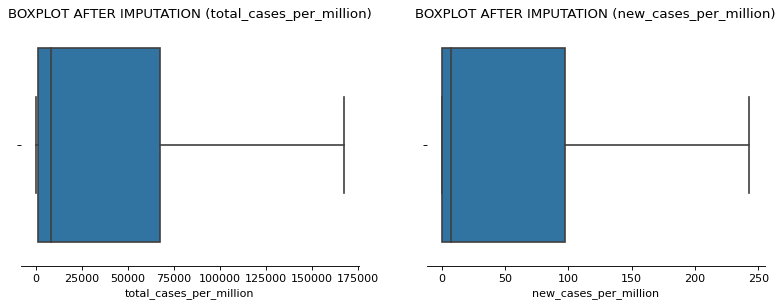

In [ ]:
fig,axes = plt.subplots(dpi = 80 , figsize = (12,4) , nrows = 1 , ncols = 2)
plt.sca(axes[0])
sns.boxplot(data['total_cases_per_million'])
plt.title('BOXPLOT AFTER IMPUTATION (total_cases_per_million)')
prepare_plot_area(plt.gca())

plt.sca(axes[1])
sns.boxplot(data['new_cases_per_million'])
plt.title('BOXPLOT AFTER IMPUTATION (new_cases_per_million)')
prepare_plot_area(plt.gca())

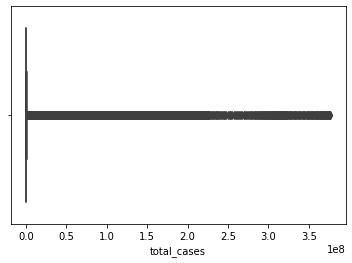

In [ ]:
sns.boxplot(data['total_cases'])

In [ ]:
print(' TOTAL CASES ')
q3 = data['total_cases'].quantile(0.75)
q1 = data['total_cases'].quantile(0.25)
iqr= q3 - q1
print("iqr:" , iqr)
upper_limit = q3 + iqr * 1.5
lower_limit = q1 - iqr * 1.5
print("[upperlimit , lower_limit]", "=",   upper_limit ,",", lower_limit)
data['total_cases'] = data['total_cases'].apply(limit_imputer)

 TOTAL CASES 
iqr: 422794.5
[upperlimit , lower_limit] = 1059782.25 , -631395.75


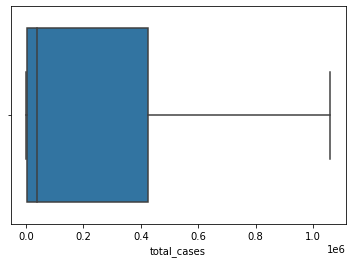

In [ ]:
sns.boxplot(data['total_cases'])

In [ ]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,total_deaths_per_million,reproduction_rate,...,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,Month,Year
count,1.899990e+05,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,...,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000
mean,2.771149e+05,540.831660,624.740603,4544.357439,6.287780,86.771396,41057.994754,61.891898,606.077691,0.721546,...,7.314141,4.600921,16564.165888,210.103244,7.285054,2.279833,68.550213,0.584084,6.401807,2020.966452
std,3.990167e+05,805.466166,906.078805,6632.722255,9.645358,429.557234,56871.068084,90.360724,940.803313,0.523897,...,6.601283,4.410069,20445.304668,143.181078,5.261122,2.634677,20.208893,0.319874,3.311171,0.774696
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.090000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2020.000000
25%,2.796000e+03,0.000000,4.429000,33.000000,0.000000,0.000000,801.951000,0.000000,10.128000,0.010000,...,2.686000,1.504000,1703.102000,113.151000,3.940000,0.000000,66.600000,0.480000,4.000000,2020.000000
50%,3.905000e+04,47.000000,79.429000,604.000000,0.000000,0.714000,7940.002000,6.814000,131.219000,0.850000,...,4.803000,2.954000,8787.580000,206.537000,6.820000,1.500000,74.480000,0.707000,6.000000,2021.000000
75%,4.255905e+05,841.000000,959.286000,7071.000000,10.000000,10.857000,67434.798500,97.208000,905.437000,1.090000,...,11.733000,7.359000,24654.385000,303.740000,10.080000,3.400000,78.930000,0.816000,9.000000,2022.000000
max,1.059782e+06,2102.500000,2391.571500,17628.000000,25.000000,8574.714000,167384.069750,243.020000,6415.067000,6.020000,...,27.049000,18.493000,116935.600000,597.029000,30.530000,13.800000,86.750000,0.957000,12.000000,2022.000000


In [ ]:
data['tests_units'].unique()

array(['0', 'tests performed', 'units unclear', 'samples tested',
       'people tested'], dtype=object)

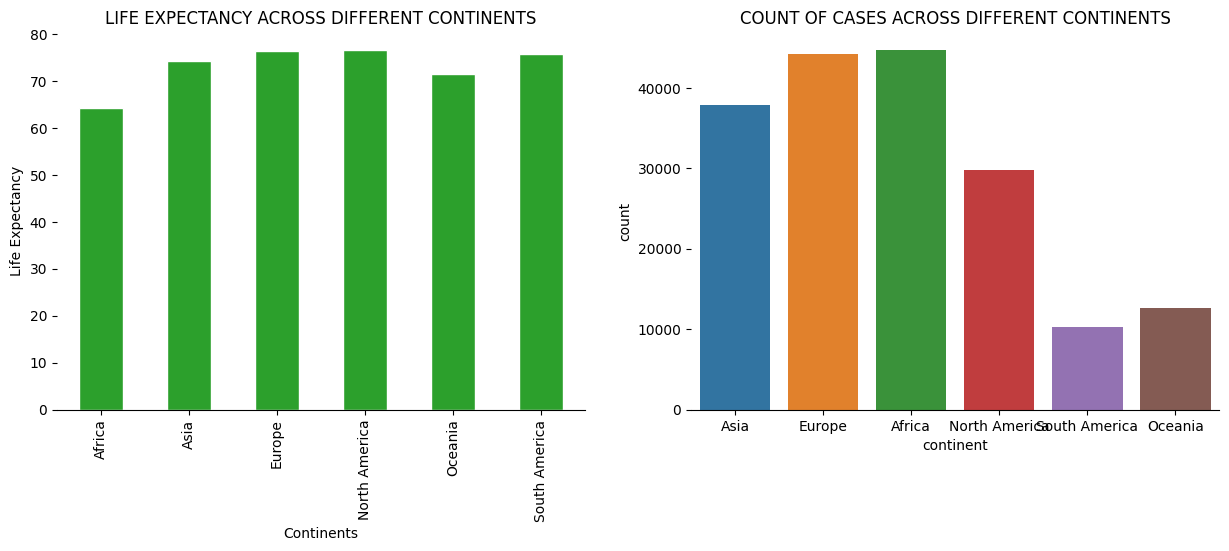

In [ ]:
fig, axes = plt.subplots( dpi = 100 , figsize = (15,5) , nrows = 1 , ncols = 2)
plt.sca(axes[0])
column  = data.groupby('continent')['life_expectancy'].mean()
column.plot(kind = 'bar' , color = colrcode[2] , edgecolor = [1,1,1] )
plt.title('LIFE EXPECTANCY ACROSS DIFFERENT CONTINENTS')
plt.xlabel('Continents')
plt.ylabel('Life Expectancy')
prepare_plot_area(plt.gca())

plt.sca(axes[1])
sns.countplot(x = data['continent'])
plt.title('COUNT OF CASES ACROSS DIFFERENT CONTINENTS')
prepare_plot_area(plt.gca())   


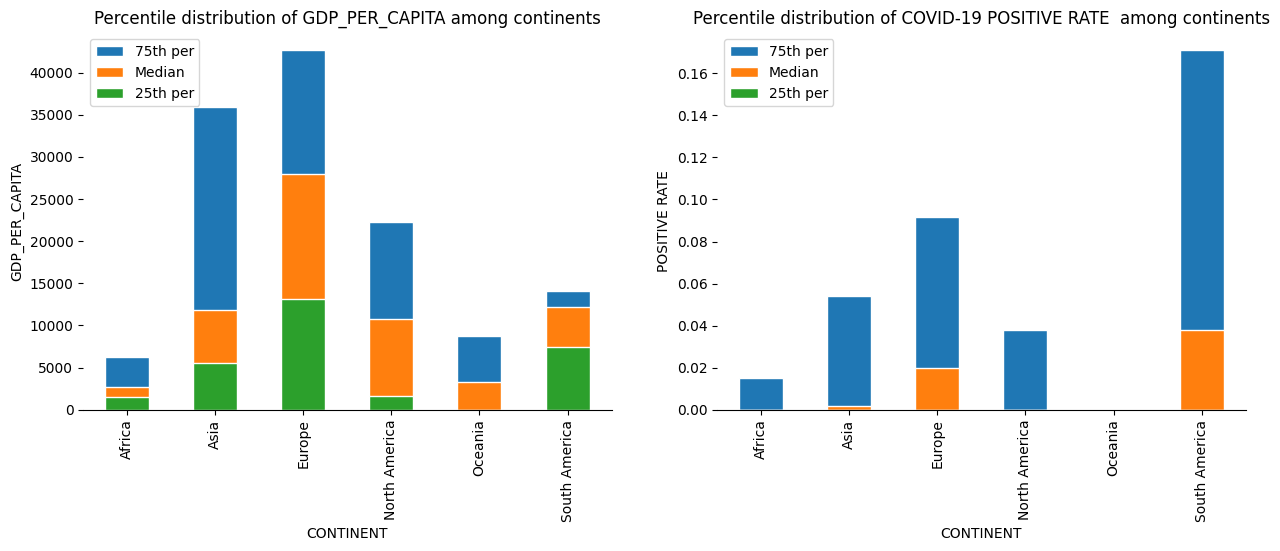

In [ ]:
fig, axes = plt.subplots(dpi = 100 , figsize = (15,5) , nrows = 1, ncols = 2)
plt.sca(axes[0])
gdp1 = data.groupby('continent')['gdp_per_capita'].quantile(.75)
gdp2 = data.groupby('continent')['gdp_per_capita'].median()
gdp3 = data.groupby('continent')['gdp_per_capita'].quantile(.25)
gdp1.plot(kind = 'bar',color = colrcode[0],label = '75th per',edgecolor = [1,1,1])
gdp2.plot(kind = 'bar',color = colrcode[1],label = 'Median',edgecolor = [1,1,1])
gdp3.plot(kind = 'bar',color = colrcode[2],label = '25th per',edgecolor = [1,1,1])
plt.title('Percentile distribution of GDP_PER_CAPITA among continents')
plt.ylabel('GDP_PER_CAPITA')
plt.xlabel('CONTINENT')
l = plt.legend(loc='upper left')
prepare_plot_area(plt.gca()) 

plt.sca(axes[1])
p1 = data.groupby('continent')['positive_rate'].quantile(.75)
p2 = data.groupby('continent')['positive_rate'].median()
p3 = data.groupby('continent')['positive_rate'].quantile(.25)
p1.plot(kind = 'bar',color = colrcode[0],label = '75th per',edgecolor = [1,1,1])
p2.plot(kind = 'bar',color = colrcode[1],label = 'Median',edgecolor = [1,1,1])
p3.plot(kind = 'bar',color = colrcode[2],label = '25th per',edgecolor = [1,1,1])
plt.title('Percentile distribution of COVID-19 POSITIVE RATE  among continents')
plt.ylabel('POSITIVE RATE')
plt.xlabel('CONTINENT')
l = plt.legend(loc='upper left')
prepare_plot_area(plt.gca()) 


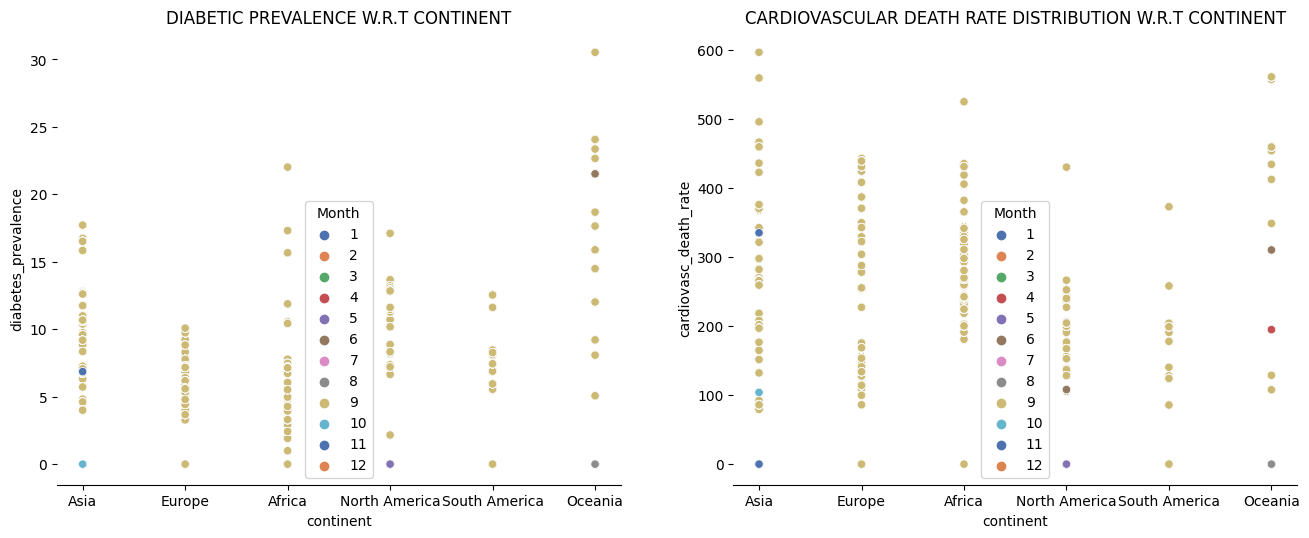

In [ ]:
fig,axes = plt.subplots(dpi = 100 , figsize = (16,6) , nrows = 1 , ncols = 2)
plt.sca(axes[0])
plt.title('DIABETIC PREVALENCE W.R.T CONTINENT')
sns.scatterplot(x='continent',y='diabetes_prevalence',data=data,hue='Month',palette = 'deep')
prepare_plot_area(plt.gca())

plt.sca(axes[1])
plt.title('CARDIOVASCULAR DEATH RATE DISTRIBUTION W.R.T CONTINENT')
sns.scatterplot(x ='continent'  , y = 'cardiovasc_death_rate',data = data , hue = 'Month' , palette = 'deep')
prepare_plot_area(plt.gca())

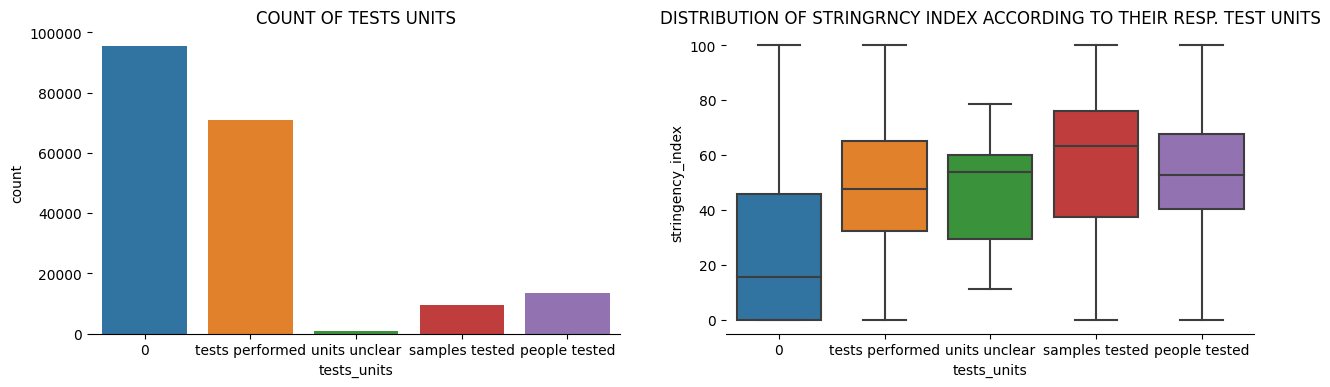

In [ ]:
fig,axes = plt.subplots(dpi = 100 , figsize = (15,4) , nrows = 1 , ncols = 2)
plt.sca(axes[0])
plt.title('COUNT OF TESTS UNITS')
sns.countplot(x = data['tests_units'])
prepare_plot_area(plt.gca())

plt.sca(axes[1])
sns.boxplot(x = 'tests_units' , y = 'stringency_index', data = data , showfliers = False)
plt.title('DISTRIBUTION OF STRINGRNCY INDEX ACCORDING TO THEIR RESP. TEST UNITS')
prepare_plot_area(plt.gca())

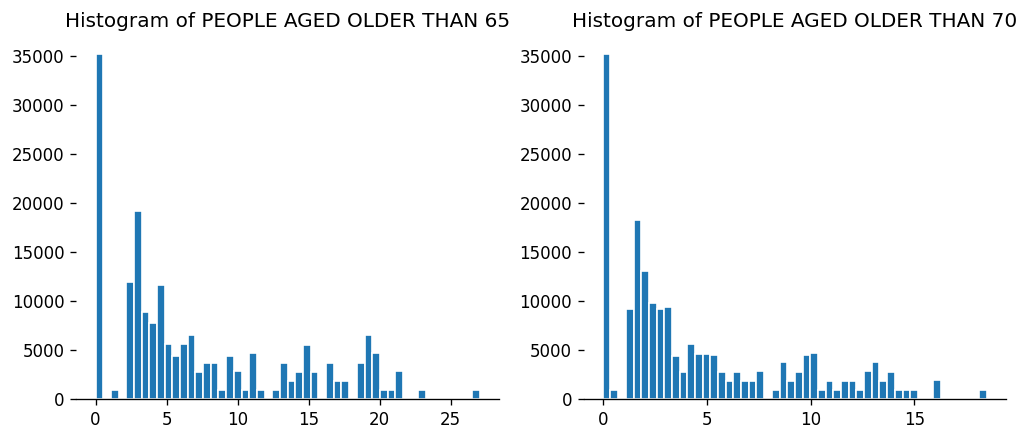

In [ ]:
fig,axes = plt.subplots(dpi = 120 , figsize=(10, 4), nrows=1, ncols=2)
plt.sca(axes[0])
plt.hist(data[data['aged_65_older'].notnull()]['aged_65_older'], 50, facecolor=colrcode[0], edgecolor = [1,1,1])
plt.title('Histogram of PEOPLE AGED OLDER THAN 65')
prepare_plot_area(plt.gca())  

plt.sca(axes[1])
plt.hist(data[data['aged_70_older'].notnull()]['aged_70_older'], 50, facecolor=colrcode[0], edgecolor = [1,1,1])
plt.title('Histogram of PEOPLE AGED OLDER THAN 70')
prepare_plot_area(plt.gca())  


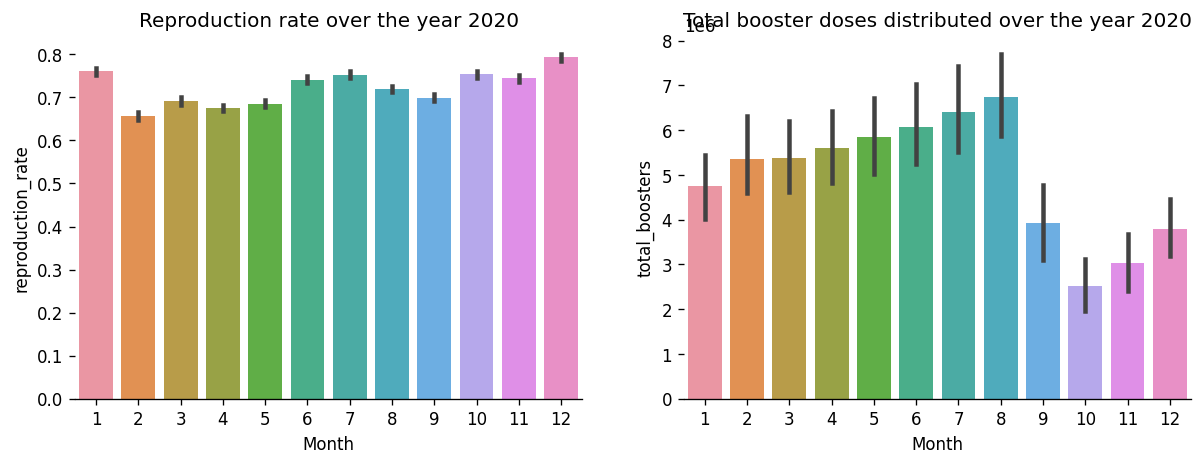

In [ ]:
fig,axes = plt.subplots(dpi = 120 , figsize = (12,4) , nrows = 1 , ncols = 2)
plt.sca(axes[0])
sns.barplot(x = data['Month'] , y = data['reproduction_rate'])
plt.title('Reproduction rate over the year 2020')
prepare_plot_area(plt.gca())

plt.sca(axes[1])
sns.barplot(x = data['Month'] , y = data['total_boosters'])
plt.title('Total booster doses distributed over the year 2020')
prepare_plot_area(plt.gca())

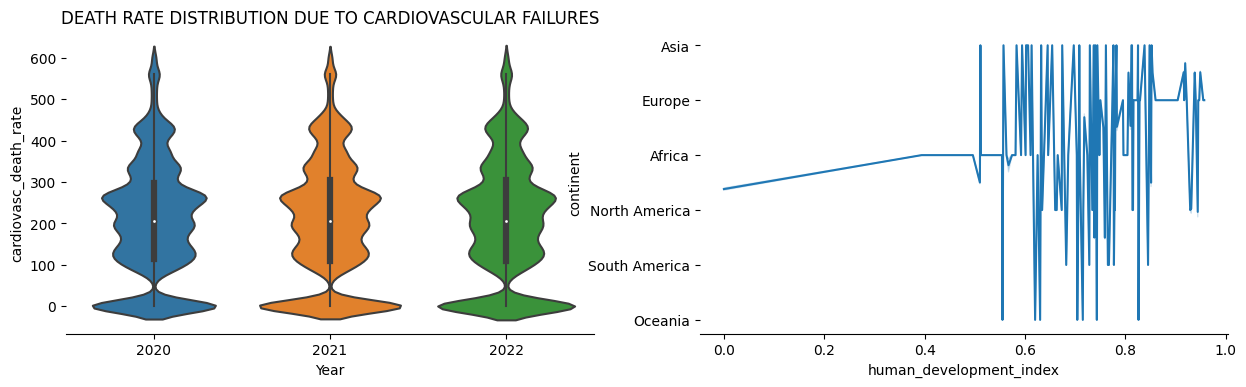

In [ ]:
fig,axes = plt.subplots(dpi = 100  , figsize = (15,4) , nrows = 1 , ncols = 2)
plt.sca(axes[0])
plt.title('DEATH RATE DISTRIBUTION DUE TO CARDIOVASCULAR FAILURES')
sns.violinplot(y = data['cardiovasc_death_rate'], x = data['Year'])
prepare_plot_area(plt.gca())

plt.sca(axes[1])
plt.title('')
sns.lineplot(x = data['human_development_index'] , y = data['continent'])
prepare_plot_area(plt.gca())

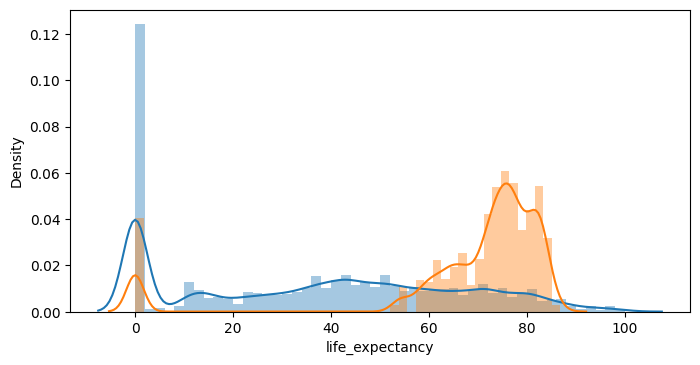

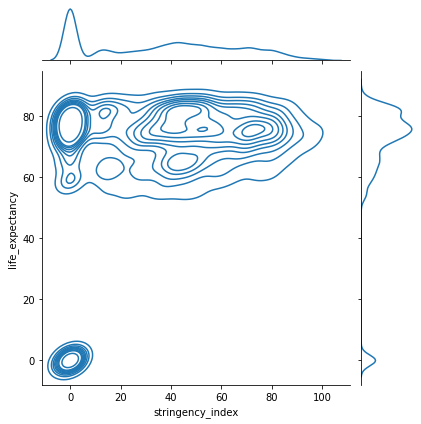

In [ ]:
fig,axes = plt.subplots(dpi = 100 , figsize = (8,4) , nrows = 1 , ncols = 1)
sns.distplot(data['stringency_index'])
sns.distplot(data['life_expectancy'])

sns.jointplot('stringency_index','life_expectancy', data, kind='kde' , label = 'wf')

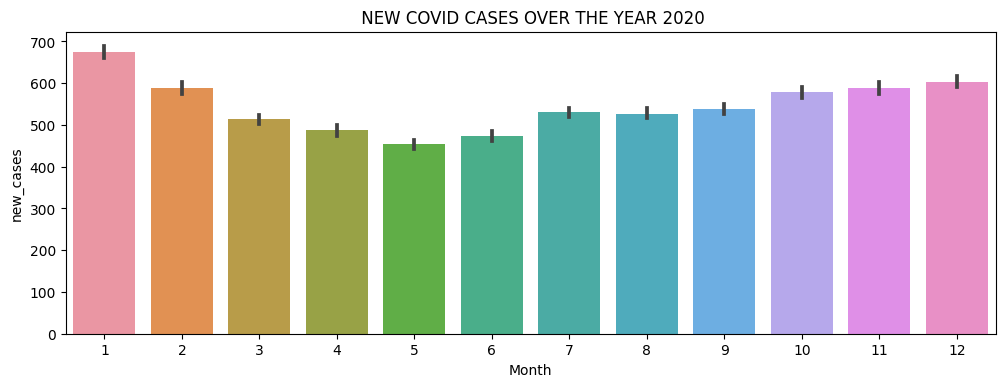

In [ ]:
plt.figure(dpi = 100 , figsize =(12,4))
x= data['Month']
y = data['new_cases']
plt.title(' NEW COVID CASES OVER THE YEAR 2020')
sns.barplot(x,y)

In [ ]:
plt.figure(dpi = 100 , figsize =(12,4))
x= data['Month']
y = data['new_deaths']
plt.yticks([2,4,6,8,10,12],['FEBRUARY' , 'APRIL' , 'JUNE' , 'AUGUST' , 'OCTOBER' , 'DECEMBER'])
plt.title( 'NEW DEATHS OVER THE YEAR 2020 DUE TO COVID-19')
plt.barh(x,y)

<BarContainer object of 189999 artists>

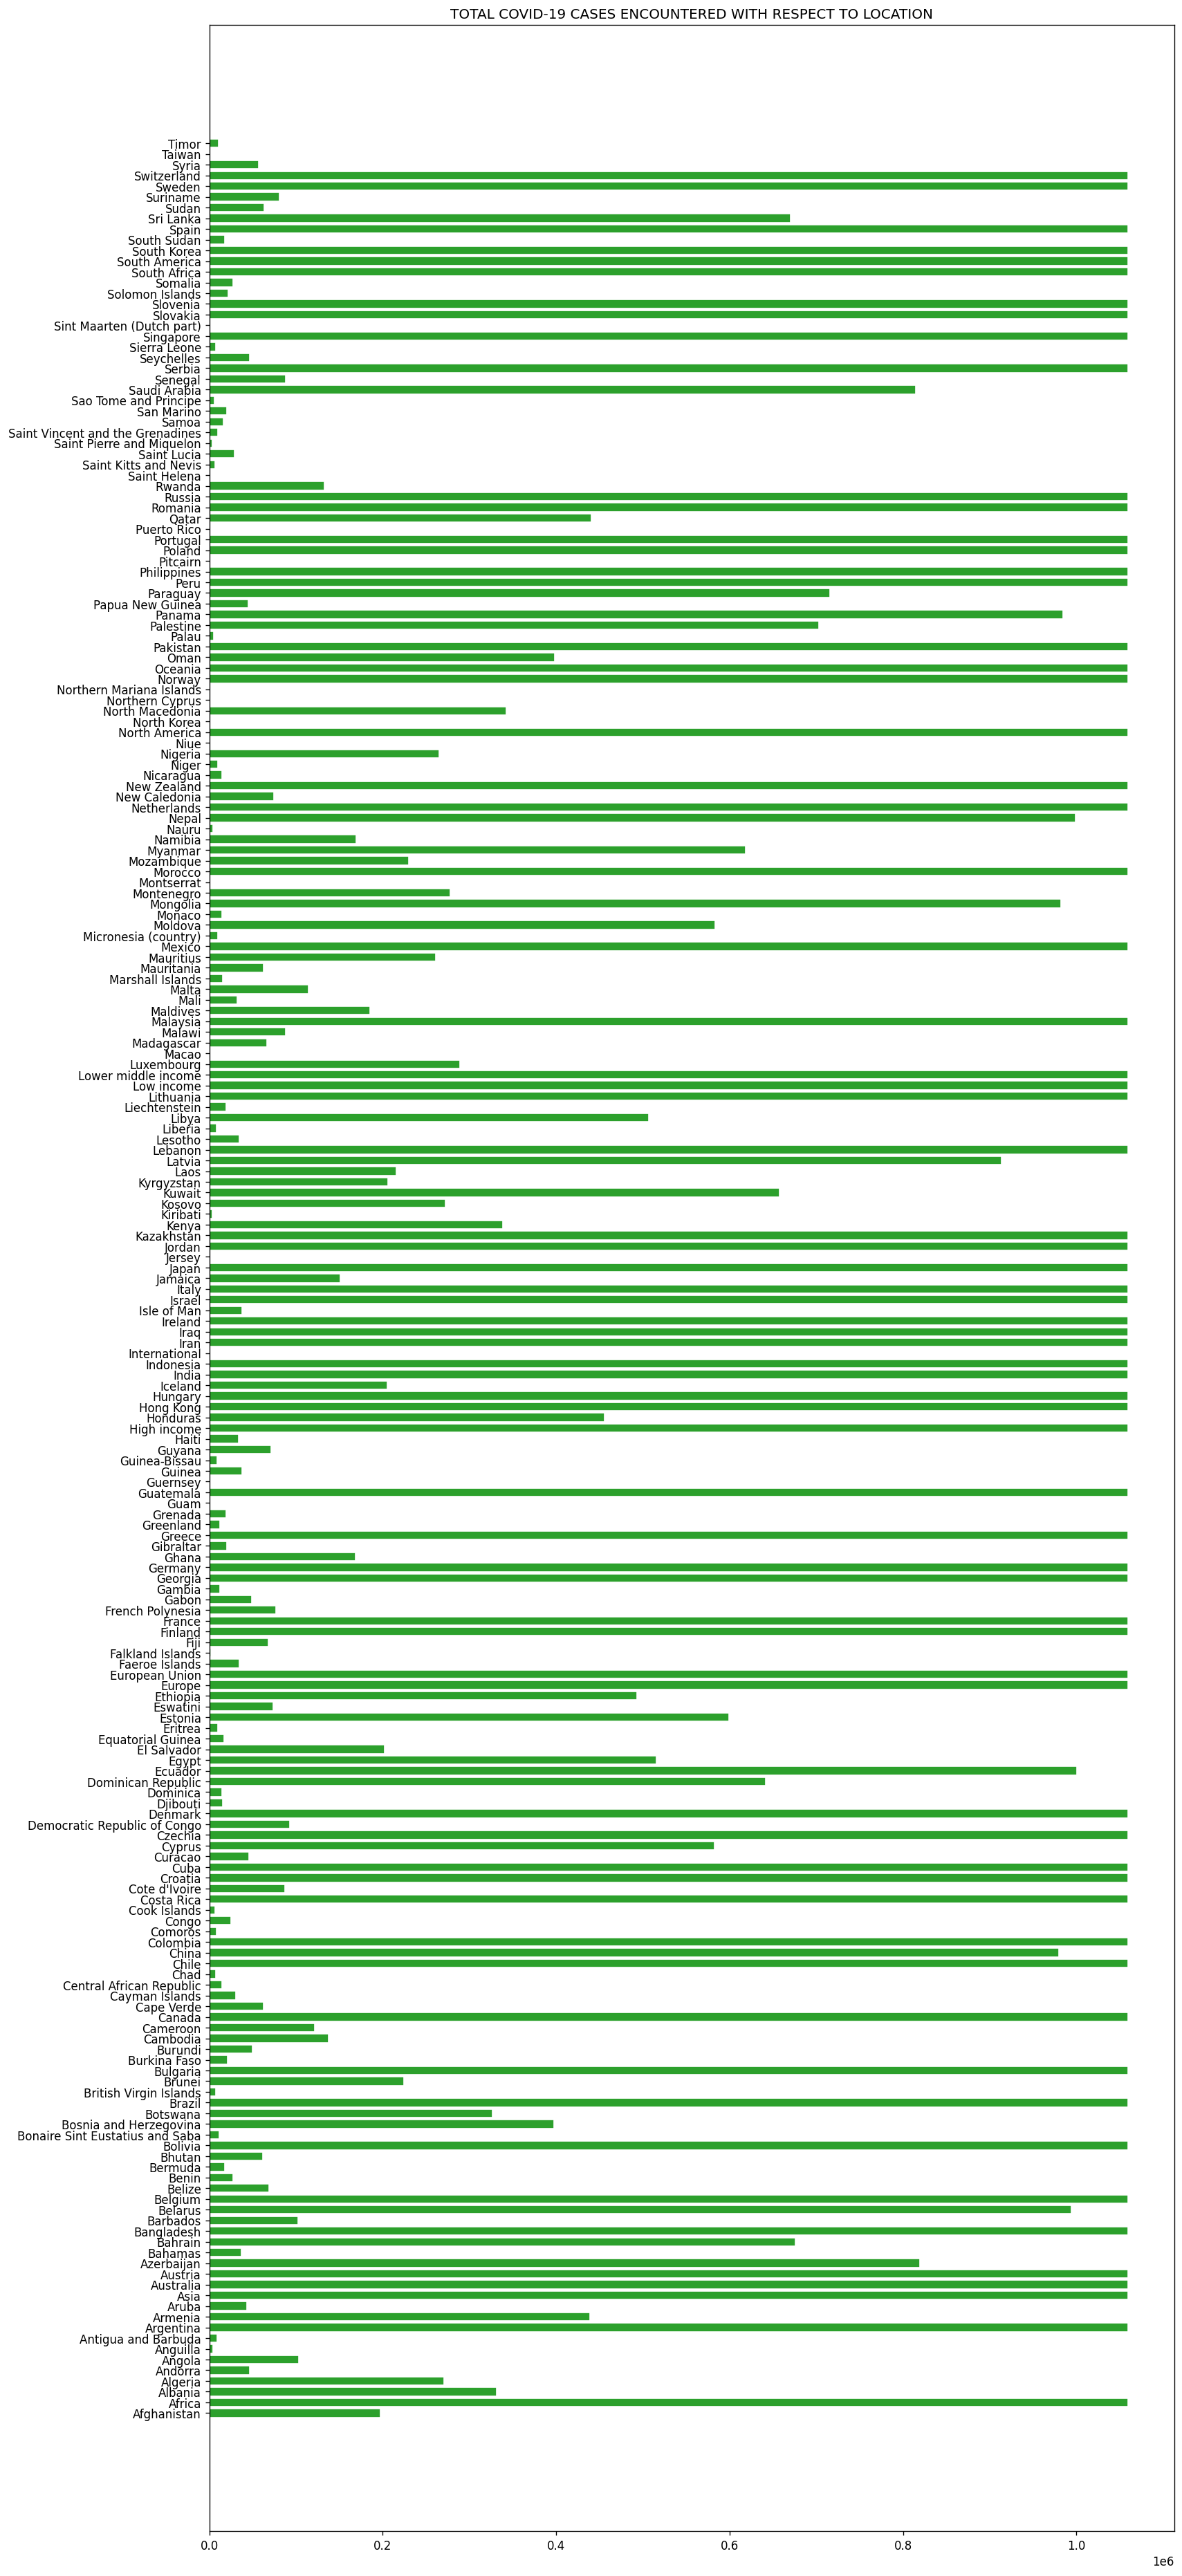

In [ ]:
plt.figure(dpi = 120 , figsize = (15,40))
x = data['location']
y = data['total_cases']
plt.title('TOTAL COVID-19 CASES ENCOUNTERED WITH RESPECT TO LOCATION')
plt.barh(x,y,color = colrcode[2] , edgecolor = [1,1,1])

<BarContainer object of 189999 artists>

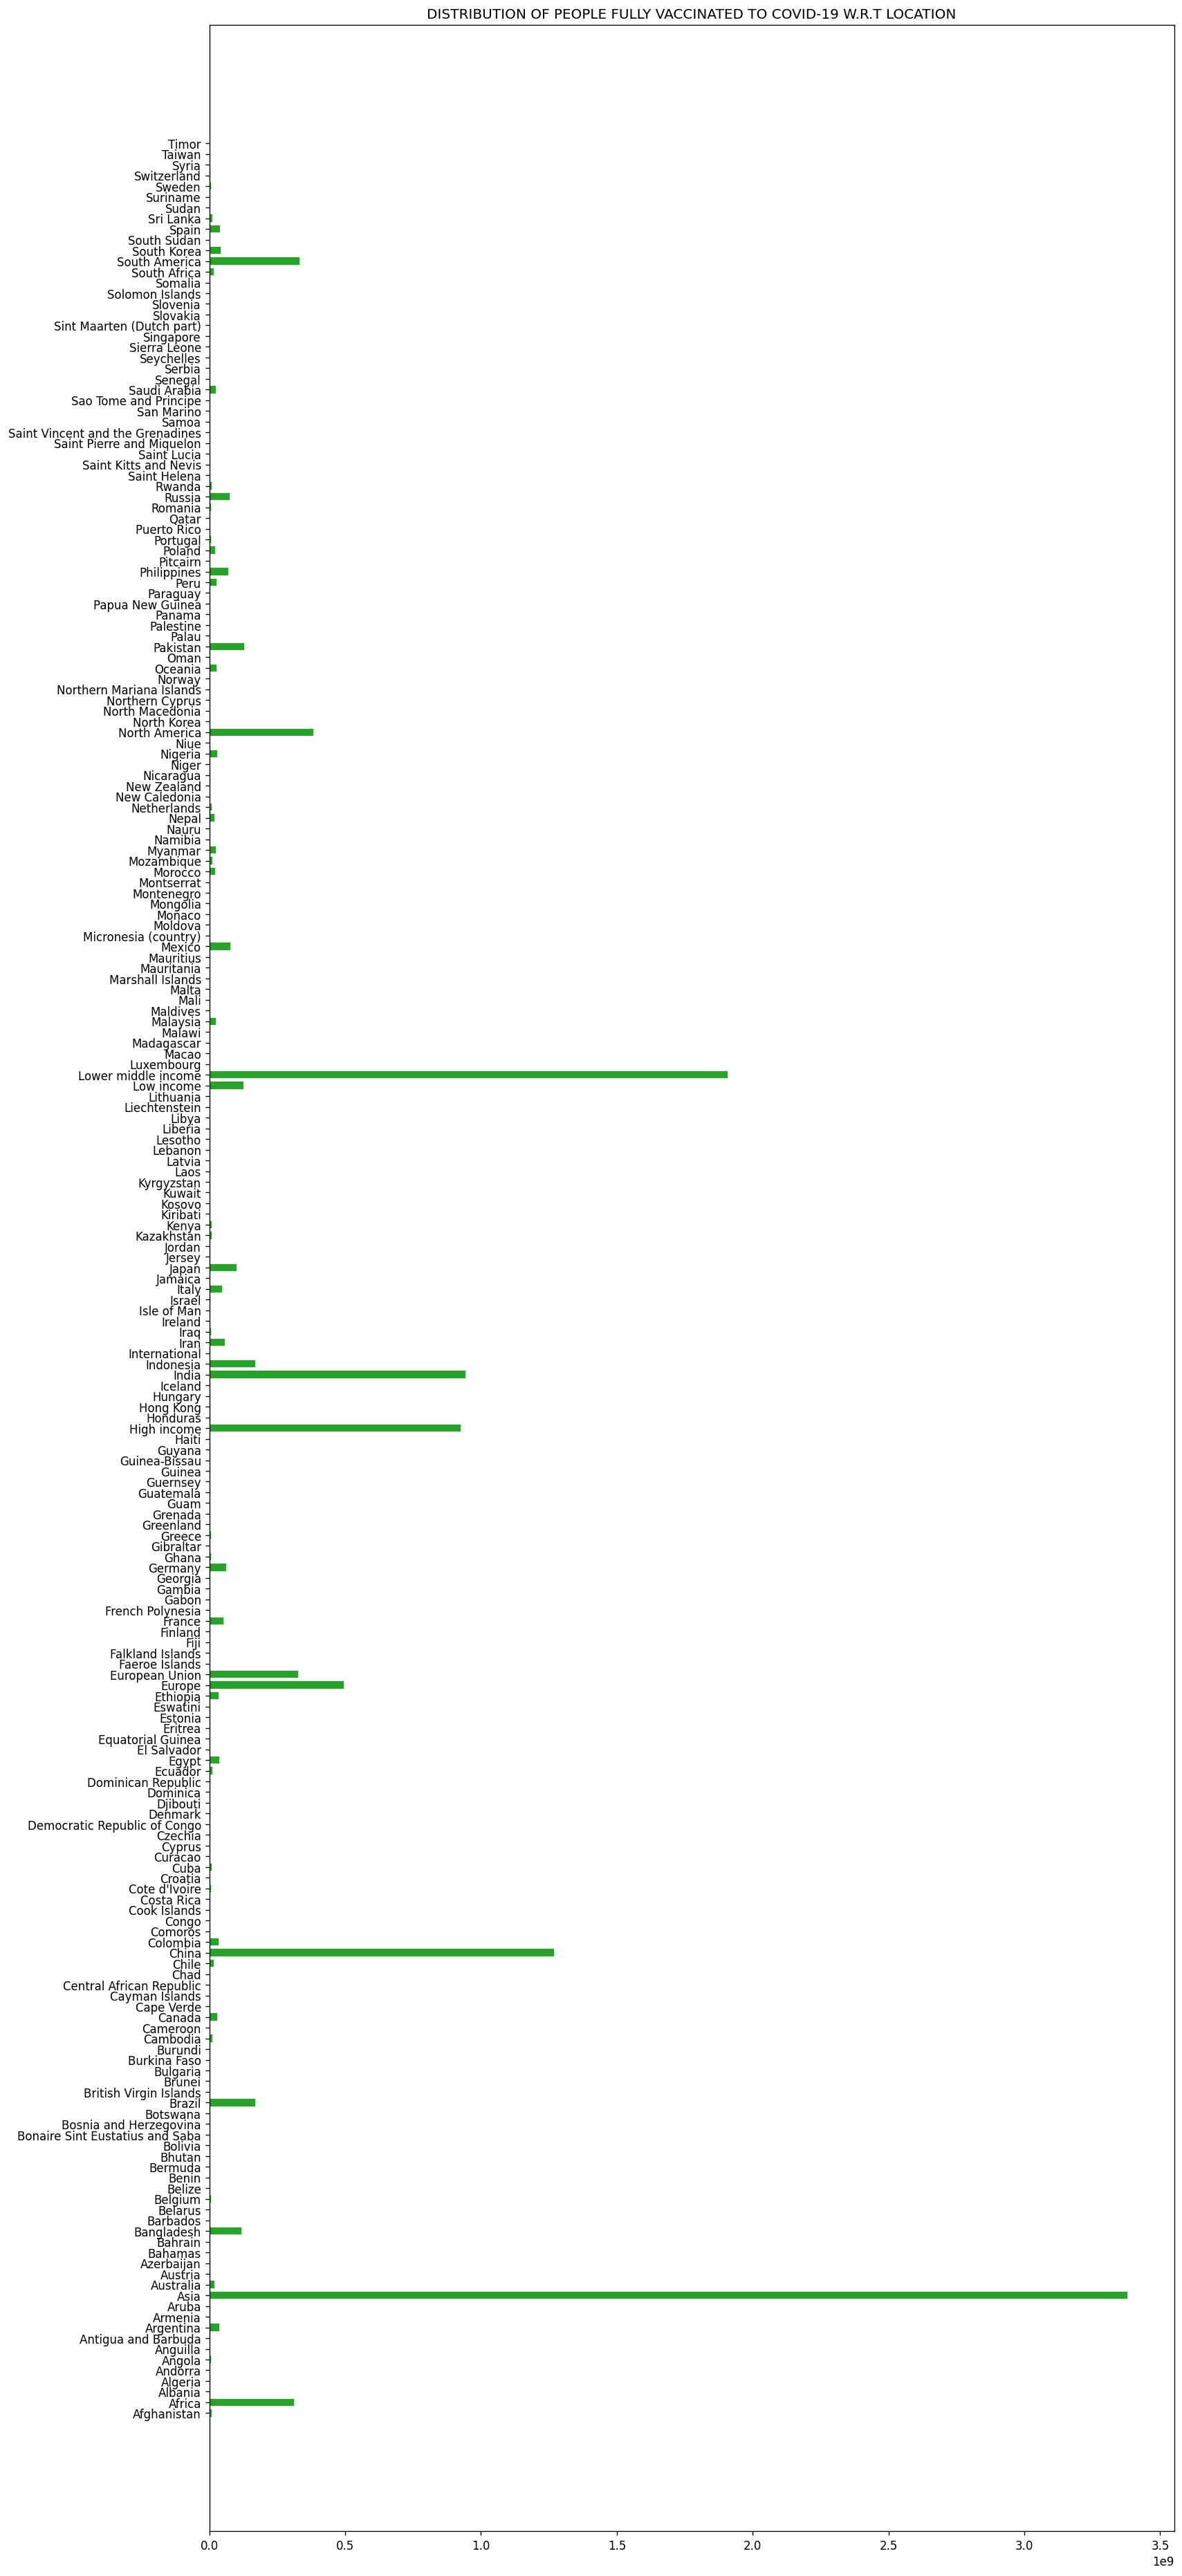

In [ ]:
plt.figure(dpi = 120 , figsize = (15,40))
x = data['location']
y = data['people_fully_vaccinated']
plt.title('DISTRIBUTION OF PEOPLE FULLY VACCINATED TO COVID-19 W.R.T LOCATION')
plt.barh(x,y,color = colrcode[2] , edgecolor = [1,1,1])

In [ ]:
corr_columns = [ 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths','total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'reproduction_rate', 'total_tests', 'positive_rate', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters','stringency_index', 'population', 'population_density', 'gdp_per_capita',
       'hospital_beds_per_thousand', 'life_expectancy','human_development_index']

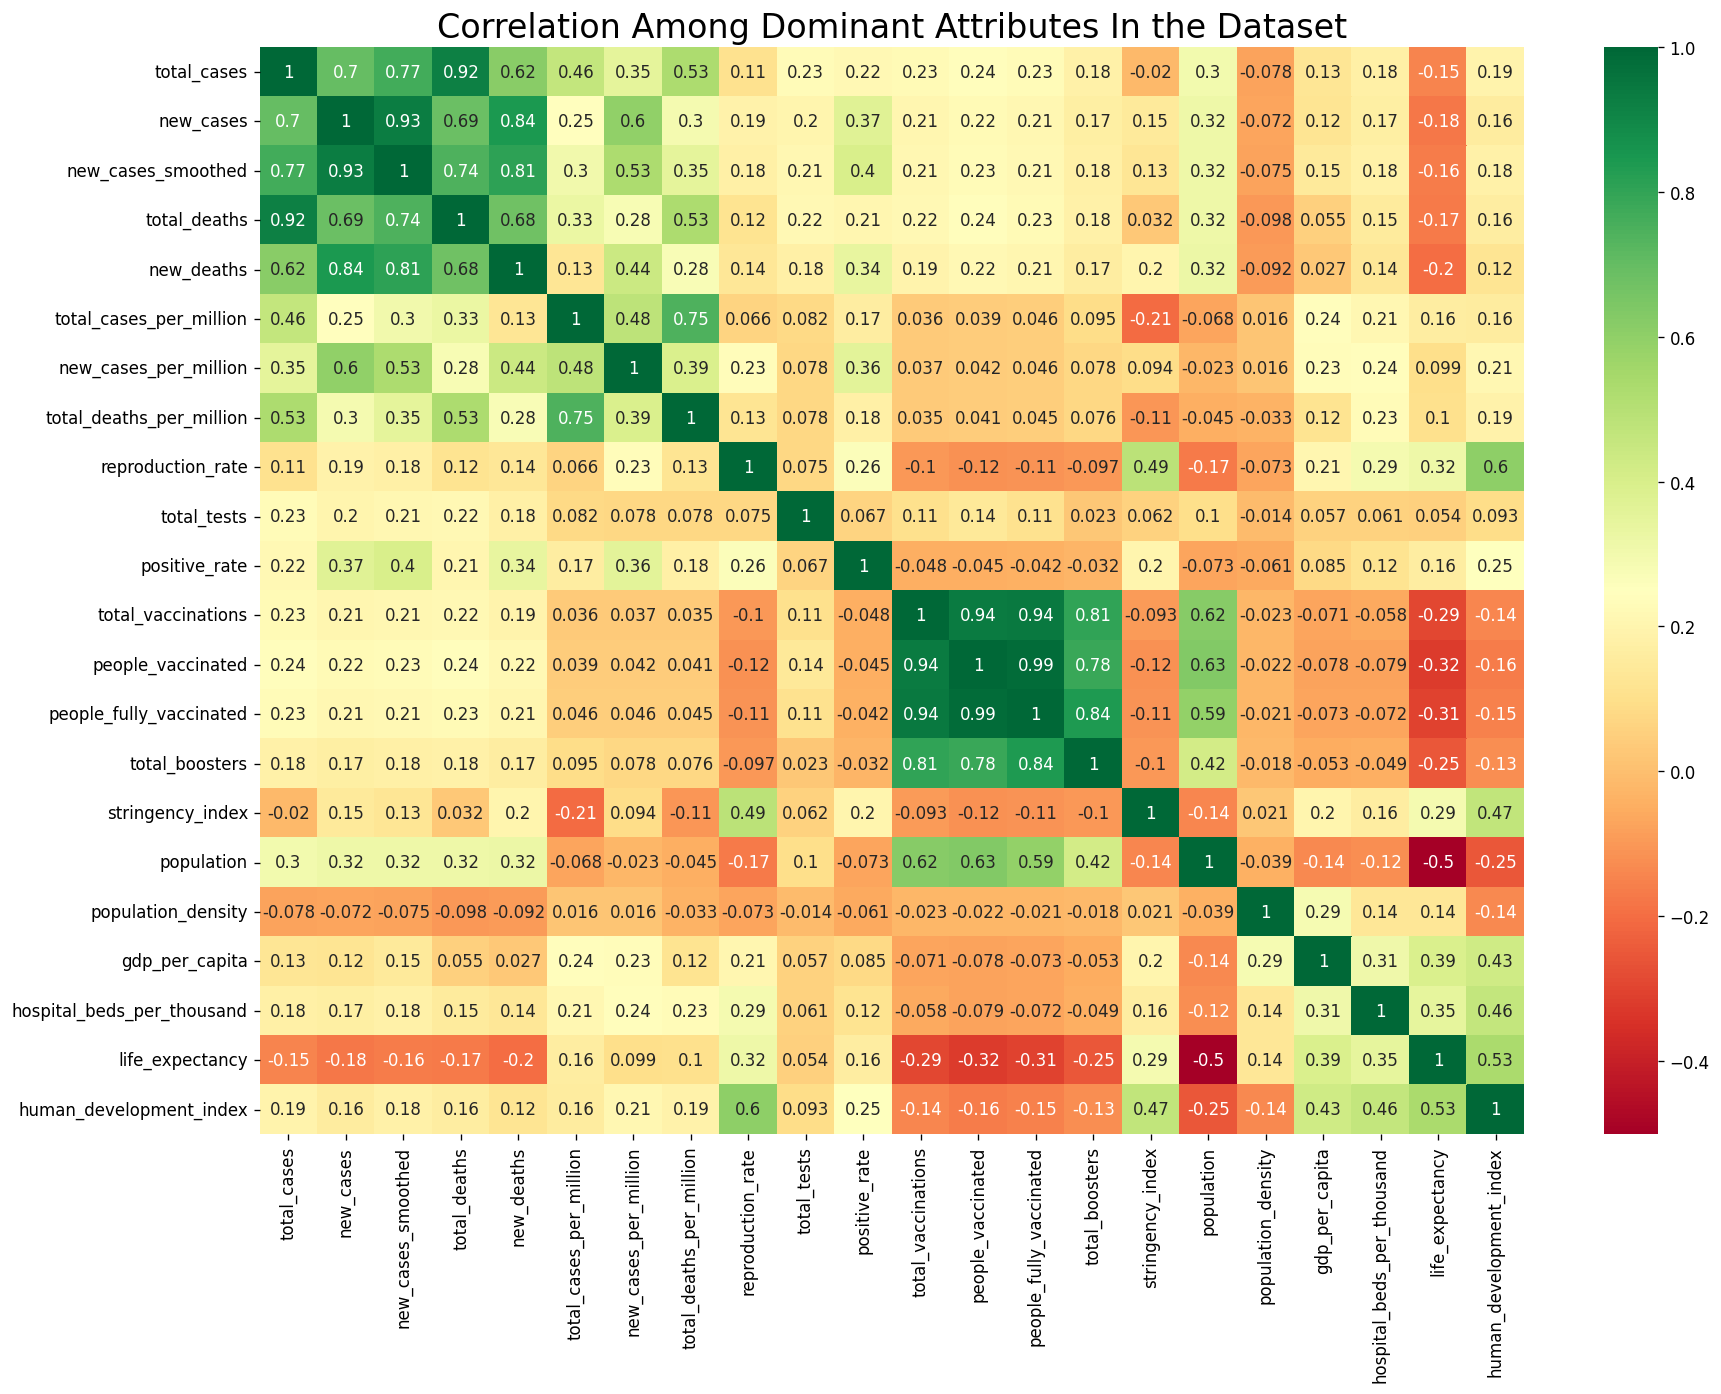

In [ ]:
plt.figure(dpi =120 , figsize = (17,12))
sns.heatmap(data[corr_columns].corr(), cmap="RdYlGn", annot = True)
plt.title('Correlation Among Dominant Attributes In the Dataset' , fontsize  = 20)
plt.show()

In [ ]:
data['tests_units'].unique()

array(['0', 'tests performed', 'units unclear', 'samples tested',
       'people tested'], dtype=object)

In [ ]:
data['tests_units'] = data['tests_units'].map({'0':0, 'tests performed':1, 'units unclear':2, 'samples tested':3,
       'people tested':4})

In [ ]:
data.drop(columns = ['iso_code' , 'location' ] , inplace = True)

In [ ]:
data['people_fully_vaccinated'].unique()

array([      0,   55624,   77560, ..., 1975069, 2012886, 2023735])

In [ ]:
data.head()


,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,total_deaths_per_million,reproduction_rate,...,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,Month,Year
0,5.0,5.0,0.0,0.0,0.0,0.0,0.125,0.125,0.0,0.0,...,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,2,2020
1,5.0,0.0,0.0,0.0,0.0,0.0,0.125,0.000,0.0,0.0,...,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,2,2020
2,5.0,0.0,0.0,0.0,0.0,0.0,0.125,0.000,0.0,0.0,...,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,2,2020
3,5.0,0.0,0.0,0.0,0.0,0.0,0.125,0.000,0.0,0.0,...,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,2,2020
4,5.0,0.0,0.0,0.0,0.0,0.0,0.125,0.000,0.0,0.0,...,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,2,2020


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
y = data['life_expectancy']

In [ ]:
X = scaler.fit_transform(data.drop(columns = ['life_expectancy']))

In [ ]:
X = pd.DataFrame(data = X , columns = data.drop( columns = ['life_expectancy']).columns)

In [ ]:
X.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,total_deaths_per_million,reproduction_rate,...,population_density,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,human_development_index,Month,Year
0,-0.694484,-0.665246,-0.689501,-0.685144,-0.651899,-0.202002,-0.721948,-0.683561,-0.644215,-1.377271,...,-0.186091,-0.717005,-0.740109,-0.721937,2.70236,0.43811,-0.675543,-0.228477,-1.329384,-1.247527
1,-0.694484,-0.671454,-0.689501,-0.685144,-0.651899,-0.202002,-0.721948,-0.684944,-0.644215,-1.377271,...,-0.186091,-0.717005,-0.740109,-0.721937,2.70236,0.43811,-0.675543,-0.228477,-1.329384,-1.247527
2,-0.694484,-0.671454,-0.689501,-0.685144,-0.651899,-0.202002,-0.721948,-0.684944,-0.644215,-1.377271,...,-0.186091,-0.717005,-0.740109,-0.721937,2.70236,0.43811,-0.675543,-0.228477,-1.329384,-1.247527
3,-0.694484,-0.671454,-0.689501,-0.685144,-0.651899,-0.202002,-0.721948,-0.684944,-0.644215,-1.377271,...,-0.186091,-0.717005,-0.740109,-0.721937,2.70236,0.43811,-0.675543,-0.228477,-1.329384,-1.247527
4,-0.694484,-0.671454,-0.689501,-0.685144,-0.651899,-0.202002,-0.721948,-0.684944,-0.644215,-1.377271,...,-0.186091,-0.717005,-0.740109,-0.721937,2.70236,0.43811,-0.675543,-0.228477,-1.329384,-1.247527


In [ ]:
X.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,total_deaths_per_million,reproduction_rate,...,population_density,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,human_development_index,Month,Year
total_cases,1.000000,0.700109,0.766270,0.920373,0.617864,0.358099,0.461143,0.349597,0.525294,0.112983,...,-0.077931,0.271419,0.267763,0.129793,-0.092646,-0.104194,0.176286,0.191233,-0.001990,0.346920
new_cases,0.700109,1.000000,0.932683,0.687209,0.843692,0.373201,0.247594,0.598237,0.295795,0.188515,...,-0.071715,0.246686,0.243935,0.123666,-0.108175,-0.105654,0.169886,0.161185,0.005238,0.077706
new_cases_smoothed,0.766270,0.932683,1.000000,0.744444,0.811289,0.379105,0.303927,0.528716,0.350801,0.178948,...,-0.075158,0.280365,0.279900,0.145021,-0.126588,-0.111496,0.180455,0.182147,-0.000736,0.118248
total_deaths,0.920373,0.687209,0.744444,1.000000,0.677405,0.373893,0.328427,0.284377,0.529600,0.118773,...,-0.098415,0.256688,0.260407,0.055189,-0.073487,-0.113486,0.150302,0.163010,0.008277,0.258151
new_deaths,0.617864,0.843692,0.811289,0.677405,1.000000,0.379805,0.129339,0.440737,0.277428,0.136482,...,-0.091990,0.209077,0.210301,0.026587,-0.065129,-0.117722,0.136352,0.123255,0.012668,-0.030026
new_deaths_smoothed,0.358099,0.373201,0.379105,0.373893,0.379805,1.000000,0.034168,0.186381,0.090859,-0.166501,...,-0.038419,-0.123930,-0.114880,-0.105745,-0.203597,-0.190411,-0.100165,-0.222892,-0.004945,-0.022765
total_cases_per_million,0.461143,0.247594,0.303927,0.328427,0.129339,0.034168,1.000000,0.480724,0.745287,0.065563,...,0.015652,0.260503,0.255895,0.238016,-0.180684,0.055366,0.209048,0.156773,-0.027997,0.562293
new_cases_per_million,0.349597,0.598237,0.528716,0.284377,0.440737,0.186381,0.480724,1.000000,0.392697,0.234423,...,0.015715,0.298107,0.293326,0.233532,-0.123394,0.024839,0.240233,0.211872,0.002045,0.155482
total_deaths_per_million,0.525294,0.295795,0.350801,0.529600,0.277428,0.090859,0.745287,0.392697,1.000000,0.125202,...,-0.032659,0.313777,0.314464,0.118969,-0.070342,0.002472,0.228659,0.188323,-0.008578,0.418831
reproduction_rate,0.112983,0.188515,0.178948,0.118773,0.136482,-0.166501,0.065563,0.234423,0.125202,1.000000,...,-0.072733,0.352225,0.342327,0.207266,0.301360,0.092676,0.294180,0.602597,0.040927,-0.042910


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(X_train , y_train)
print("Coefficients: ",lr.intercept_ ,  lr.coef_ )

Coefficients:  68.53659435843305 [-3.4042515  -1.57098627 -1.20736478  2.42726224 -1.20486638 -3.43746824
  3.36719151  0.74540523 -0.80969208 -0.25832143  0.51784809  0.93116606
  1.09306881  1.47898436  2.86255992  0.02582822 -1.84749411 -1.48597876
  0.57298199  1.58986473 -4.29705819  2.5763816  -0.45016385  4.09986094
  1.05841737 -0.0597842   3.77918656  0.36588543  4.1421548   0.15473107
 -0.55185487]


In [ ]:
prediction = lr.predict(X_test)
lr.score(X_test , y_test)*100

60.46083689987274

In [ ]:
from sklearn import metrics
import numpy as np

In [ ]:
print('MAS =',metrics.mean_absolute_error(y_test, prediction))

MAS = 7.79770699979162


In [ ]:
print('RMSE = ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

RMSE =  12.58845622372458


In [ ]:
from sklearn.metrics import r2_score
print("R square =  ", r2_score(y_test,prediction))

R square =   0.6046083689987274


In [ ]:
print("y error (difference between observed and predicted values) = ", y_test, prediction)

y error (difference between observed and predicted values) =  56466     71.99
140202    74.48
30342     75.05
166093    81.07
167005    72.53
          ...  
114477     0.00
165485    76.20
95707     81.40
132707    76.68
22718     71.78
Name: life_expectancy, Length: 57000, dtype: float64 [74.12453798 68.85305174 78.3166992  ... 57.30073216 65.94841567
 75.84084428]


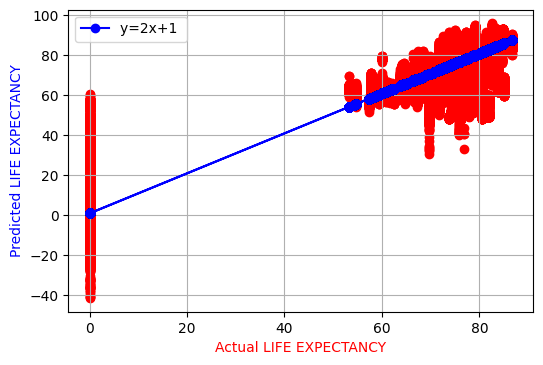

In [ ]:
import matplotlib.pyplot as plt
plt.figure( dpi = 100)
plt.scatter(y_test, prediction, color='red')
plt.xlabel('Actual LIFE EXPECTANCY', color='red')
plt.ylabel('Predicted LIFE EXPECTANCY', color='blue')
plt.plot(y_test , y_test +1, '-o' , linestyle='solid',label='y=2x+1 ', color='blue')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
Actual_Predicted_Diff_table  = pd.DataFrame( {'Actual Life Expectancy': y_test , 'Predicted Life Expectancy': prediction})

In [ ]:
Actual_Predicted_Diff_table.head(20)

,Actual Life Expectancy,Predicted Life Expectancy
56466,71.99,74.124538
140202,74.48,68.853052
30342,75.05,78.316699
166093,81.07,49.516182
167005,72.53,72.037445
21399,61.77,58.877861
91863,0.00,48.374967
162691,69.02,67.993892
147405,82.40,86.361947
5733,81.88,50.185275


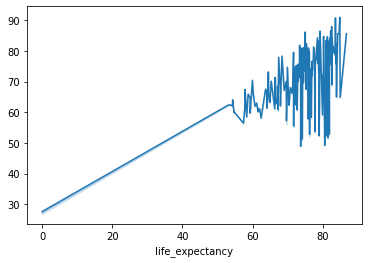

In [ ]:

sns.lineplot(y_test , prediction)

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_sm = sm.add_constant( X_train)
lr = sm.OLS( y_train , X_train_sm)
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const                         68.536594
total_cases                   -3.404251
new_cases                     -1.570986
new_cases_smoothed            -1.207365
total_deaths                   2.427262
new_deaths                    -1.204866
new_deaths_smoothed           -3.437468
total_cases_per_million        3.367192
new_cases_per_million          0.745405
total_deaths_per_million      -0.809692
reproduction_rate             -0.258321
hosp_patients                  0.517848
total_tests                    0.931166
positive_rate                  1.093069
tests_units                    1.478984
total_vaccinations             2.862560
people_vaccinated              0.025828
people_fully_vaccinated       -1.847494
total_boosters                -1.485979
new_vaccinations               0.572982
stringency_index               1.589865
population                    -4.297058
population_density             2.576382
aged_65_older                 -0.450164
aged_70_older                  4.099861


In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     6567.
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                        07:13:36   Log-Likelihood:            -5.2731e+05
No. Observations:              132999   AIC:                         1.055e+06
Df Residuals:                  132967   BIC:                         1.055e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         68.5366      0.035   1959.545      0.000      68.468      68.605
total_cases                   -3.4043      0.114    -29.916      0.000      -3.627      -3.181
new_cases                     -1.5710      0.120    -13.061      0.000      -1.807      -1.335
new_cases_smoothed            -1.2074      0.114    -10.612      0.000      -1.430      -0.984
total_deaths                   2.4273      0.113     21.399      0.000       2.205       2.650
new_deaths                    -1.2049      0.074    -16.301      0.000      -1.350      -1.060
new_deaths_smoothed           -3.4375      0.047    -73.330      0.000      -3.529      -3.346
total_cases_per_million        3.3672      0.072     46.455      0.000       3.225       3.509
new_cases_per_million          0.7454      0.056     13.301      0.000       0.636       0.855
total_deaths_per_million      -0.8097      0.065    -12.398      0.000      -0.938      -0.682
reproduction_rate             -0.2583      0.048     -5.378      0.000      -0.352      -0.164
hosp_patients                  0.5178      0.038     13.505      0.000       0.443       0.593
total_tests                    0.9312      0.035     26.388      0.000       0.862       1.000
positive_rate                  1.0931      0.043     25.267      0.000       1.008       1.178
tests_units                    1.4790      0.043     34.369      0.000       1.395       1.563
total_vaccinations             2.8626      0.122     23.399      0.000       2.623       3.102
people_vaccinated              0.0258      0.306      0.084      0.933      -0.574       0.626
people_fully_vaccinated       -1.8475      0.315     -5.866      0.000      -2.465      -1.230
total_boosters                -1.4860      0.078    -18.951      0.000      -1.640      -1.332
new_vaccinations               0.5730      0.069      8.306      0.000       0.438       0.708
stringency_index               1.5899      0.049     32.757      0.000       1.495       1.685
population                    -4.2971      0.056    -77.386      0.000      -4.406      -4.188
population_density             2.5764      0.040     64.083      0.000       2.498       2.655
aged_65_older                 -0.4502      0.178     -2.533      0.011      -0.799      -0.102
aged_70_older                  4.0999      0.176     23.323      0.000       3.755       4.444
gdp_per_capita                 1.0584      0.050     21.300      0.000       0.961       1.156
cardiovasc_death_rate         -0.0598      0.048     -1.254      0.210      -0.153       0.034
diabetes_prevalence            3.7792      0.040     95.555      0.000       3.702       3.857
hospital_beds_per_thousand     0.3659      0.047      7.785      0.000       0.274       0.458
human_development_index        4.1422      

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(X_train , y_train)
print("Coefficients: ",lr.intercept_ ,  lr.coef_ )

Coefficients:  68.53659435843305 [-3.4042515  -1.57098627 -1.20736478  2.42726224 -1.20486638 -3.43746824
  3.36719151  0.74540523 -0.80969208 -0.25832143  0.51784809  0.93116606
  1.09306881  1.47898436  2.86255992  0.02582822 -1.84749411 -1.48597876
  0.57298199  1.58986473 -4.29705819  2.5763816  -0.45016385  4.09986094
  1.05841737 -0.0597842   3.77918656  0.36588543  4.1421548   0.15473107
 -0.55185487]


In [ ]:
coefficients_table  = pd.DataFrame( {'columns':X_train.columns , 'coefficients':lr.coef_} )
coefficients_table = coefficients_table.sort_values( by = 'coefficients')

Text(0.5, 1.0, 'Normalized coefficient plot')

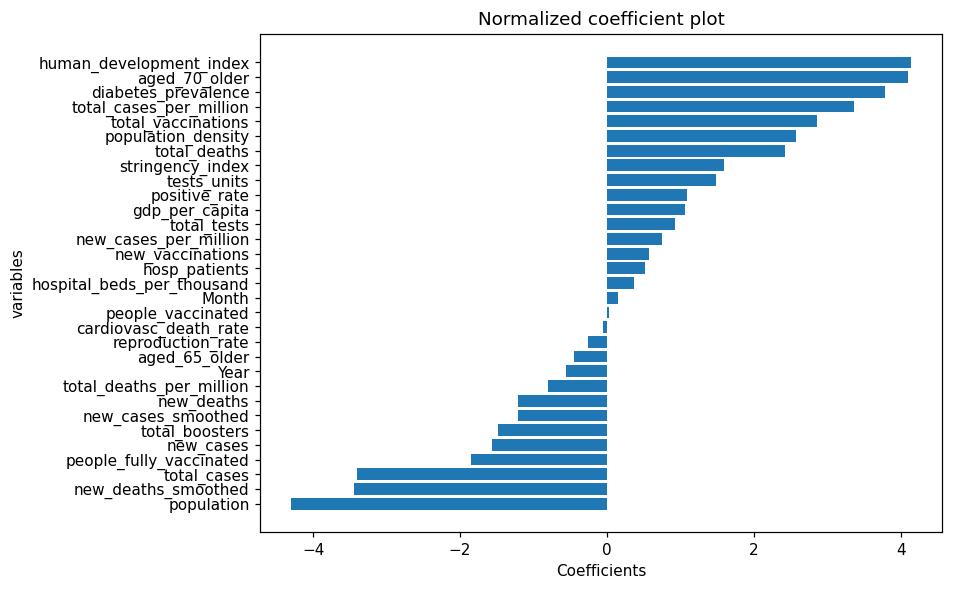

In [ ]:
plt.figure( dpi = 110 , figsize = (8,6))
x = coefficients_table['columns']
y = coefficients_table['coefficients']
plt.barh(x,y)
plt.xlabel('Coefficients')
plt.ylabel('variables')
plt.title('Normalized coefficient plot')